 ## 1.1. Скачайте датасет fifаs2.сsv. 

In [506]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [507]:
 from pathlib import Path

In [508]:
file_name = './fifa_s2.csv'

In [509]:
Path(file_name).resolve()

WindowsPath('C:/Users/Alex/Documents/GB/DE_ETL_2023/L2_S2/fifa_s2.csv')

In [510]:
df = pd.read_csv(Path(file_name).resolve())

In [511]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,1179,G. Buffon,40,Italy,88,88,Paris Saint-Germain,4000.0,77,Right,4.0,1.0,GK,2018,01/01/2019,6.333333,203.0,7400.0
1,5479,Casillas,37,Spain,82,82,FC Porto,1500.0,10,Left,4.0,1.0,NaN,2015,01/01/2019,6.083333,185.0,3000.0
2,8205,Braga,35,Portugal,70,70,CD Aves,750.0,5,Right,1.0,3.0,LCM,2017,01/01/2019,5.916667,165.0,1600.0
3,9014,A. Robben,34,Netherlands,84,84,FC Bayern München,15500.0,110,Left,4.0,4.0,RM,2009,01/01/2019,5.916667,176.0,25600.0
4,19521,J. Ibehre,35,England,61,61,Cambridge United,120.0,2,Right,1.0,2.0,ST,2017,01/01/2019,6.333333,203.0,210.0


## 1.2. Проанализируйте его и определите, какие данные являются неполными. 

In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2399 non-null   int64  
 1   Name                      2399 non-null   object 
 2   Age                       2399 non-null   int64  
 3   Nationality               2392 non-null   object 
 4   Overall                   2399 non-null   int64  
 5   Potential                 2399 non-null   int64  
 6   Club                      2158 non-null   object 
 7   Value                     2142 non-null   float64
 8   Wage                      2399 non-null   int64  
 9   Preferred Foot            2399 non-null   object 
 10  International Reputation  2389 non-null   float64
 11  Skill Moves               2393 non-null   float64
 12  Position                  2378 non-null   object 
 13  Joined                    2399 non-null   int64  
 14  Contract

In [513]:
df_row_count = len(df.index)
df_col_count = df.shape[1]
print(f'В датасете {df_row_count} строк и {df_col_count} колонок.')

В датасете 2399 строк и 18 колонок.


In [514]:
print('Столбцы, имеющие пропуски и доля пропусков')
print(df[df.columns[df.isnull().any()].to_list()].isnull().sum()/df_row_count)

Столбцы, имеющие пропуски и доля пропусков
Nationality                 0.002918
Club                        0.100459
Value                       0.107128
International Reputation    0.004168
Skill Moves                 0.002501
Position                    0.008754
Contract Valid Until        0.113797
Release Clause              0.001251
dtype: float64


In [515]:
print(f'Количество колонок, имеющих пропуски {len(df.columns[df.isnull().any()])}. \
Количество колонок без пропусков {df_col_count - len(df.columns[df.isnull().any()])}.')

Количество колонок, имеющих пропуски 8. Количество колонок без пропусков 10.


In [516]:
# Можно выделить три колонки, имеющие значительное количество пропусков
# Club                        0.100459 - Наименование клуба - категориальная переменная
# Value                       0.107128 - Ценность (игрока)
# Contract Valid Until        0.113797 - Срок истечения контракта

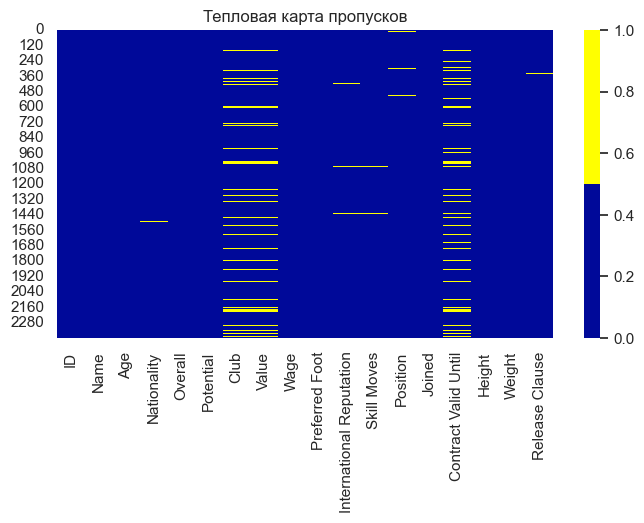

In [517]:
colorus = ['#000999', '#ffff00']
plt.title('Тепловая карта пропусков')
plt.rcParams['figure.figsize'] = (8, 4)
ax = sns.heatmap(df.isnull(), cmap=sns.color_palette(colorus));

## 1.3. Удалите ненужные колонки и недостающие значения.

### Рассмотрим поподробнее каждую колонку с ропусками и определим какие действия будем предпринимать.

In [518]:
# Nationality - национальность
# Категориальная переменная
# Доля пропусков 0.002918

In [519]:
# Определим возможные значения для категориальной переменной
df['Nationality'].value_counts().index.to_list()

['Spain',
 'England',
 'Germany',
 'Italy',
 'Chile',
 'Brazil',
 'France',
 'Portugal',
 'Argentina',
 'Switzerland',
 'Australia',
 'Scotland',
 'Republic of Ireland',
 'Sweden',
 'India',
 'Russia',
 'Netherlands',
 'Japan',
 'Paraguay',
 'China PR',
 'Bolivia',
 'Ivory Coast',
 'Croatia',
 'Belgium',
 'Denmark',
 'Bulgaria',
 'Wales',
 'Turkey',
 'Uruguay',
 'Cameroon',
 'Nigeria',
 'Romania',
 'South Africa',
 'Austria',
 'Poland',
 'Hungary',
 'Ecuador',
 'Venezuela',
 'Egypt',
 'Iceland',
 'New Zealand',
 'Colombia',
 'Serbia',
 'Senegal',
 'Morocco',
 'Czech Republic',
 'Peru',
 'Canada',
 'Slovenia',
 'Greece',
 'Mexico',
 'Finland',
 'United States',
 'Northern Ireland',
 'Ghana',
 'Albania',
 'Norway',
 'Bosnia Herzegovina',
 'Mali',
 'Montenegro',
 'Guinea',
 'Cape Verde',
 'Algeria',
 'DR Congo',
 'Honduras',
 'Guinea Bissau',
 'Jamaica',
 'Ukraine',
 'Slovakia',
 'Georgia',
 'Angola',
 'Gabon',
 'Kosovo',
 'Dominican Republic',
 'Korea Republic',
 'Costa Rica',
 'Benin',


In [520]:
# Всего 102 возможных значения в категориальной переменной.
# Утверждать, что 102 значения это все возможные значения нельзя.

In [521]:
df.loc[df['Nationality'].isna()]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
85,156432,G. Hoarau,34,NaN,77,77,BSC Young Boys,4700.0,26,Right,2.0,3.0,LS,2014,01/01/2020,6.333333,187.0,7000.0
372,186146,D. Welbeck,27,NaN,77,77,Arsenal,9500.0,95,Right,3.0,3.0,LW,2014,01/01/2019,6.083333,161.0,18100.0
894,207894,T. Strobl,28,NaN,77,77,Borussia Mönchengladbach,7000.0,27,Right,2.0,2.0,CDM,2016,01/01/2020,6.166667,170.0,11900.0
1206,219411,J. Izquierdo,25,NaN,77,78,Brighton & Hove Albion,10500.0,45,Right,2.0,4.0,LM,2017,01/01/2021,5.583333,165.0,20700.0
1492,227476,Soares,27,NaN,78,79,FC Porto,12000.0,17,Right,1.0,3.0,LS,2017,01/01/2021,6.166667,181.0,24900.0
1527,228251,L. Pellegrini,22,NaN,78,84,Roma,14000.0,51,Right,2.0,3.0,CM,2017,01/01/2022,6.083333,170.0,26600.0
1550,228881,D. Calabria,21,NaN,78,88,Milan,14500.0,52,Right,1.0,3.0,RB,2015,01/01/2022,5.750000,154.0,27600.0


In [522]:
# Целесообразно заполнить недостающие значеня категориальной переменной 
# Т.к. пропущенных значений немного, а имена футболистов известны, и известна их национальность. Предположим, что мы дополнили
# данные о национальности  футболиста из некой экспертной системы.
nationality_by_name = {
    "G. Hoarau":"France",
    "D. Welbeck":"England",
    "T. Strobl":"Germany",
    "J. Izquierdo":"Colombia",
    "Soares":"Brazil",
    "L. Pellegrini":"Italy",
    "D. Calabria":"Italy",}
def fill_nationality(name, missig_vallue="_MISSING_"):
    "Эмулирует работу экспертной системы. Если значение не найдено, возвращет маркер пропуска."
    return nationality_by_name.get(name, missig_vallue)
fill_nationality("D. Welbeck")

'England'

In [523]:
col_nationality = 'Nationality_up'
missing_tag = '_MISSING_'
if col_nationality in df.columns:
    df.drop([col_nationality], axis=1, inplace=True)
df[col_nationality] = np.where(df['Nationality'].isna(), df['Name'].apply(lambda x: fill_nationality(x).upper()),\
                               df['Nationality'].apply(lambda x: missing_tag if x is np.nan is np.nan else x.upper()))
#df.loc[df[col_nationality] == missing_tag]
df.loc[df['Nationality'].isna()]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Nationality_up
85,156432,G. Hoarau,34,NaN,77,77,BSC Young Boys,4700.0,26,Right,2.0,3.0,LS,2014,01/01/2020,6.333333,187.0,7000.0,FRANCE
372,186146,D. Welbeck,27,NaN,77,77,Arsenal,9500.0,95,Right,3.0,3.0,LW,2014,01/01/2019,6.083333,161.0,18100.0,ENGLAND
894,207894,T. Strobl,28,NaN,77,77,Borussia Mönchengladbach,7000.0,27,Right,2.0,2.0,CDM,2016,01/01/2020,6.166667,170.0,11900.0,GERMANY
1206,219411,J. Izquierdo,25,NaN,77,78,Brighton & Hove Albion,10500.0,45,Right,2.0,4.0,LM,2017,01/01/2021,5.583333,165.0,20700.0,COLOMBIA
1492,227476,Soares,27,NaN,78,79,FC Porto,12000.0,17,Right,1.0,3.0,LS,2017,01/01/2021,6.166667,181.0,24900.0,BRAZIL
1527,228251,L. Pellegrini,22,NaN,78,84,Roma,14000.0,51,Right,2.0,3.0,CM,2017,01/01/2022,6.083333,170.0,26600.0,ITALY
1550,228881,D. Calabria,21,NaN,78,88,Milan,14500.0,52,Right,1.0,3.0,RB,2015,01/01/2022,5.750000,154.0,27600.0,ITALY


In [550]:
# Признак Clib категориальный
df['Club'].value_counts()

Manchester City       33
Arsenal               33
CD Leganés            33
Cardiff City          33
Liverpool             33
                      ..
Fc Barcelona           2
Livingston FC          1
FC Heidenheim 1846     1
Aalborg BK             1
FC Köln                1
Name: Club, Length: 81, dtype: int64

In [524]:
# Заполним категориальный признак и исправим выявленные ошибки заполнения.
# Присутствуют строки, содержащие префикс "1. " Например "1. FC Heidenheim 1846" и без префикса "FC Heidenheim 1846"
# Префикс нужно удалить и привести наименования к верхнему регистру.
# Т.к. нет никаких группирующих признаков в датасете по которым можно было бы восстановить пропущенные значения
# наименования клуба, но наименование клуба ценный признак, заполним пропуски маркером пропущенного значения.
# df['Club'] = df['Club'].astype(str) # в колонке есть значения типа float оказывается это значения nan

missing_tag = '_MISSING_'
col_club = 'Club_up'
df[col_club] = df['Club'].apply(lambda x: \
                missing_tag if x is np.nan is np.nan else \
                                x.upper().replace('  ','').replace('1. ', ''))#.value_counts()df

In [525]:
df[df['Club'] == 'NO_CLUB']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Nationality_up,Club_up


In [526]:
# Проанализируем датасет на предмет отсутствия значений у поля Wage - зарплата.
df.loc[(df['Wage'] == 0)].shape[0] # - 241

241

In [527]:
# Наблюдаем ситуацию, когда записи с пропускаи образуют группу.
df.loc[df['Club'].isna() & df['Value'].isna() & df['Contract Valid Until'].isna() & (df['Wage'] == 0)].shape[0] # - 241

241

In [528]:
# Не заполнено значение Club, Value - ценность, Contract Valid Until - срок завершения контракта, при этом Wage - 
# зарплата равна 0 (ноль) 
# Предположим, что записи относятся к футболистам, не имеющим контракта.
# Для этой группы записей заполним пропуски
# Club == NO_CLUB
# Value = 0
# Contract Valid Until - срок окончания контракта:
#  - выделим число, месяц, год в отдельные поля CVU_day, CVU_month, CVU_year
#  - для отутствующих значений укажем 0
#  - добавим маркер Exiists_conract [0, 1]

In [531]:
field_tag = 'Exiists_conract'
CVU_day, CVU_month, CVU_year = 'CVU_day', 'CVU_month', 'CVU_year'
if field_tag in df.columns:
    df.drop([field_tag], axis=1, inplace=True)
if CVU_day in df.columns:
    df.drop([CVU_day], axis=1, inplace=True)
if CVU_month in df.columns:
    df.drop([CVU_month], axis=1, inplace=True)
if CVU_year in df.columns:
    df.drop([CVU_year], axis=1, inplace=True)


df.loc[df['Wage'] == 0, 'Club_up'] = 'NO_CLUB'
df[CVU_day] = df['Contract Valid Until'].apply(lambda x: 0 if x is np.nan else x[:2])
df[CVU_month] = df['Contract Valid Until'].apply(lambda x: 0 if x is np.nan else x[3:5])
df[CVU_year] = df['Contract Valid Until'].apply(lambda x: 0 if x is np.nan else x[6:])

if 'Value_new' in df.columns:
    df.drop(['Value_new'], axis=1, inplace=True)
df['Value_new'] = np.where(df['Wage'] == 0, 0, df['Value'])

df.loc[df['Wage'] == 0]
# добавим маркер Value_undefined [0, 1]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Contract Valid Until,Height,Weight,Release Clause,Nationality_up,Club_up,CVU_day,CVU_month,CVU_year,Value_new
48,140222,P. Da Silva,38,Paraguay,72,72,NaN,NaN,0,Right,...,NaN,5.916667,168.0,4585.060806,PARAGUAY,NO_CLUB,0,0,0,0.0
72,147899,C. Moţi,33,Romania,69,69,NaN,NaN,0,Right,...,NaN,6.000000,172.0,4585.060806,ROMANIA,NO_CLUB,0,0,0,0.0
81,153160,R. Raldes,37,Bolivia,70,70,NaN,NaN,0,Right,...,NaN,5.916667,172.0,4585.060806,BOLIVIA,NO_CLUB,0,0,0,0.0
84,156092,J. Villar,41,Paraguay,77,77,NaN,NaN,0,Right,...,NaN,5.916667,187.0,4585.060806,PARAGUAY,NO_CLUB,0,0,0,0.0
89,156713,A. Granqvist,33,Sweden,80,80,NaN,NaN,0,Right,...,NaN,6.333333,185.0,4585.060806,SWEDEN,NO_CLUB,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,246403,B. Caicedo,26,Ecuador,72,75,NaN,NaN,0,Left,...,NaN,5.916667,159.0,4585.060806,ECUADOR,NO_CLUB,0,0,0,0.0
2389,246404,J. Cifuente,25,Ecuador,68,70,NaN,NaN,0,Right,...,NaN,5.833333,170.0,4585.060806,ECUADOR,NO_CLUB,0,0,0,0.0
2390,246405,B. Angulo,22,Ecuador,71,77,NaN,NaN,0,Right,...,NaN,6.000000,154.0,4585.060806,ECUADOR,NO_CLUB,0,0,0,0.0
2391,246406,X. Arreaga,23,Ecuador,66,71,NaN,NaN,0,Right,...,NaN,6.000000,165.0,4585.060806,ECUADOR,NO_CLUB,0,0,0,0.0


In [505]:
df['Wage']==0

0       True
1       True
2       True
3       True
4       True
        ... 
2394    True
2395    True
2396    True
2397    True
2398    True
Name: Wage, Length: 2399, dtype: bool

In [540]:
# Посчитаем сколько осталось незаполенных значений Value 
df.loc[df['Value'].isna() & (df['Wage']!=0)].shape[0]

16

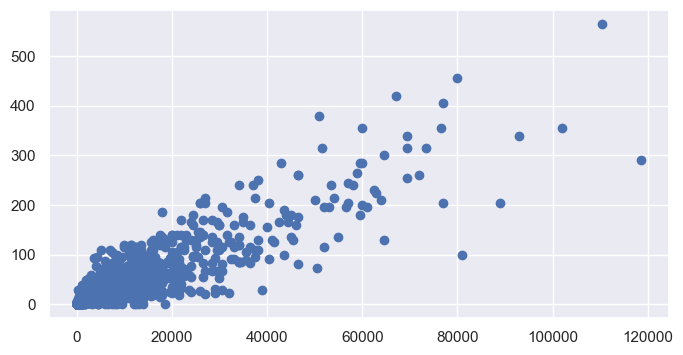

In [545]:
# Между значениями Value и Wage существует линейная зависимость
plt.scatter(df['Value'],df['Wage']);

In [ ]:
# Удалять строки с пропусками в колонке Value не будем. Преположим, что мы заполним их значениями,
# определенными на основании регрессионной модели на следующих этапах.

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Contract Valid Until,Height,Weight,Release Clause,Nationality_up,Club_up,CVU_day,CVU_month,CVU_year,Value_new
19,53748,K. Pilkington,44,England,48,48,Cambridge United,NaN,1,Right,...,01/01/2023,6.166667,190.0,4585.060806,ENGLAND,CAMBRIDGE UNITED,01,01,2023,NaN
283,180403,Willian,29,Brazil,84,84,Chelsea,NaN,175,Right,...,01/01/2020,5.750000,172.0,56400.000000,BRAZIL,CHELSEA,01,01,2020,NaN
299,181783,M. Mandžukić,32,Croatia,84,84,Juventus,NaN,160,Right,...,01/01/2020,6.250000,187.0,41300.000000,CROATIA,JUVENTUS,01,01,2020,NaN
309,182495,M. Cáceres,31,Uruguay,78,78,Lazio,NaN,44,Right,...,01/01/2019,5.916667,172.0,11900.000000,URUGUAY,LAZIO,01,01,2019,NaN
390,186942,I. Gündoğan,27,Germany,84,84,Manchester City,NaN,175,Right,...,01/01/2020,5.916667,176.0,59200.000000,GERMANY,MANCHESTER CITY,01,01,2020,NaN
411,188377,K. Walker,28,England,84,84,Manchester City,NaN,165,Right,...,01/01/2022,6.000000,154.0,45300.000000,ENGLAND,MANCHESTER CITY,01,01,2022,NaN
490,190941,L. Hrádecký,28,Finland,84,84,Bayer 04 Leverkusen,NaN,74,Right,...,01/01/2023,6.333333,187.0,37400.000000,FINLAND,BAYER 04 LEVERKUSEN,01,01,2023,NaN
498,191202,N. Matić,29,Serbia,84,84,Manchester United,NaN,165,Left,...,01/01/2020,6.333333,187.0,44400.000000,SERBIA,MANCHESTER UNITED,01,01,2020,NaN
522,192563,B. Leno,26,Germany,84,87,Arsenal,NaN,115,Right,...,01/01/2023,6.250000,183.0,53300.000000,GERMANY,ARSENAL,01,01,2023,NaN
540,193082,J. Cuadrado,30,Colombia,84,84,Juventus,NaN,150,Right,...,01/01/2020,5.833333,159.0,48700.000000,COLOMBIA,JUVENTUS,01,01,2020,NaN


In [542]:
# Еще раз выведем информацию о пропусках
print(df[df.columns[df.isnull().any()].to_list()].isnull().sum())

Nationality                   7
Club                        241
Value                       257
International Reputation     10
Skill Moves                   6
Position                     21
Contract Valid Until        273
Release Clause                3
Value_new                    16
dtype: int64


In [ ]:
# Остались необработанными пропуски в колонках 
# International Reputation     10
# Skill Moves                   6
# Position                     21
# Release Clause                3

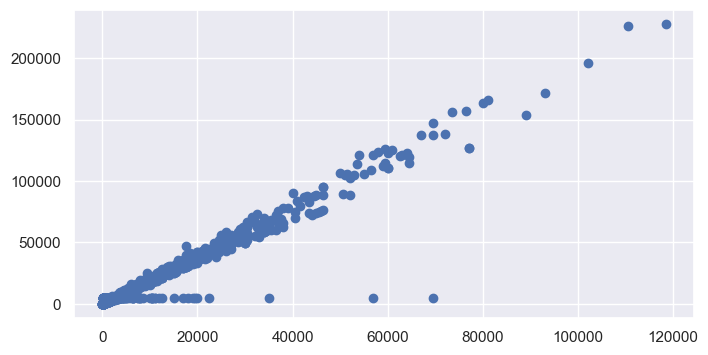

In [546]:
# Между значениями Value и Wage существует линейная зависимость
plt.scatter(df['Value'],df['Release Clause']);

In [548]:
# Не будем исключиать строки, имеющие пропуски в колонке Release Clause
# Предположим, что мы заполним пропуски на следующих этапах используя регрессионную модель

In [549]:
# Посчитаем общее количество строк имеющих пропуски.
df.loc[df['International Reputation'].isna() | \
      df['Skill Moves'].isna() |\
      df['Position'].isna() ]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Contract Valid Until,Height,Weight,Release Clause,Nationality_up,Club_up,CVU_day,CVU_month,CVU_year,Value_new
1,5479,Casillas,37,Spain,82,82,FC Porto,1500.0,10,Left,...,01/01/2019,6.083333,185.000000,3000.000000,SPAIN,FC PORTO,01,01,2019,1500.0
12,48940,P. Čech,36,Czech Republic,82,82,Arsenal,3000.0,60,Left,...,01/01/2019,6.416667,198.000000,5700.000000,CZECH REPUBLIC,ARSENAL,01,01,2019,3000.0
101,158963,L. Biglia,32,Argentina,82,82,Milan,12500.0,98,Right,...,01/01/2020,5.833333,139.000000,21300.000000,ARGENTINA,MILAN,01,01,2020,12500.0
132,165229,L. Koscielny,32,France,82,82,Arsenal,12500.0,115,Right,...,01/01/2020,6.083333,165.000000,23800.000000,FRANCE,ARSENAL,01,01,2020,12500.0
179,171320,G. Miller,31,Scotland,62,62,Carlisle United,200.0,2,Right,...,NaN,5.946771,165.979129,4585.060806,SCOTLAND,CARLISLE UNITED,0,0,0,200.0
209,173521,Marcano,31,Spain,82,82,Roma,15000.0,73,Left,...,01/01/2021,6.166667,170.000000,25500.000000,SPAIN,ROMA,01,01,2021,15000.0
264,178509,O. Giroud,31,France,82,82,Chelsea,20000.0,140,Left,...,01/01/2019,6.333333,203.000000,37000.000000,FRANCE,CHELSEA,01,01,2019,20000.0
278,179847,F. Fazio,31,Argentina,82,82,Roma,15000.0,73,Right,...,01/01/2020,6.416667,187.000000,25500.000000,ARGENTINA,ROMA,01,01,2020,15000.0
293,181291,G. Wijnaldum,27,Netherlands,82,82,Liverpool,23000.0,130,Right,...,01/01/2021,5.750000,152.000000,43700.000000,NETHERLANDS,LIVERPOOL,01,01,2021,23000.0
300,181786,V. Ćorluka,32,Croatia,82,82,Lokomotiv Moscow,12500.0,1,Right,...,01/01/2020,6.333333,185.000000,26300.000000,CROATIA,LOKOMOTIV MOSCOW,01,01,2020,12500.0


In [551]:
# International Reputation - категориальный признак
df['International Reputation'].value_counts()
# На последющих этапах обработки датасета его целесобрзано заменить булевыми признаками.

1.0    1903
2.0     288
3.0     150
4.0      43
5.0       5
Name: International Reputation, dtype: int64

In [552]:
# Skill Moves - категориальный признак
df['Skill Moves'].value_counts()
# На последющих этапах обработки датасета его целесобрзано заменить булевыми признаками.

2.0    969
3.0    917
1.0    277
4.0    206
5.0     24
Name: Skill Moves, dtype: int64

In [575]:
# Удалим строки из датасета с пропусками, которые не будем обрабатывать
df_1 = df.loc[~(df['International Reputation'].isna() | \
      df['Skill Moves'].isna() |\
      df['Position'].isna() |\
      df['Release Clause'].isna())]

# Можно удалить колонки пропуски в которых обработаны.
# Nationality
# Club 
# Value 
# Contract Valid Until

# Колонки удалять не будем, т.к. первоначальные здачения могут пригодиться на последующих этапах обработки датасета.
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2365 entries, 0 to 2398
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2365 non-null   int64  
 1   Name                      2365 non-null   object 
 2   Age                       2365 non-null   int64  
 3   Nationality               2358 non-null   object 
 4   Overall                   2365 non-null   int64  
 5   Potential                 2365 non-null   int64  
 6   Club                      2124 non-null   object 
 7   Value                     2108 non-null   float64
 8   Wage                      2365 non-null   int64  
 9   Preferred Foot            2365 non-null   object 
 10  International Reputation  2365 non-null   float64
 11  Skill Moves               2365 non-null   float64
 12  Position                  2365 non-null   object 
 13  Joined                    2365 non-null   int64  
 14  Contract

In [582]:
# Приведем имена футболистов к верхнему регистру и удалим пробелы.
# Будем использовать эту колонку на сдледующих этапах анализа
col_name = 'Name_new'
if col_name in df_1.columns:
    df_1.drop([col_name], axis=1, inplace=True)
df_1[col_name] =  df_1['Name'].apply(lambda x: x.upper().replace(' ',''))
df_1[col_name]

C:\Users\Alex\AppData\Local\Temp\ipykernel_3124\4077447696.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop([col_name], axis=1, inplace=True)
C:\Users\Alex\AppData\Local\Temp\ipykernel_3124\4077447696.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[col_name] =  df_1['Name'].apply(lambda x: x.upper().replace(' ',''))


0           G.BUFFON
2              BRAGA
3           A.ROBBEN
4           J.IBEHRE
5       RICARDOCOSTA
            ...     
2394        GUERRERO
2395      H.MASSENGO
2396    GUILLEMJAIME
2397      FRANGARCÍA
2398         FIDALGO
Name: Name_new, Length: 2365, dtype: object

## 2. Найдите в датафрейме полные дубликаты и удалите их. Значения могут быть одинаковыми, но написаны по-разному. Например, может отличаться размер регистра (заглавные и строчные буквы). Особое внимание уделить колонке с названиями команд.

In [597]:
# Поиск дубликатово будем выполнять с учетом ранее добавленных колонок, содержащих обработанные данные.
col_duplicates_criteria = [
    'Age',
    'Overall',
    'Potential',
    'Wage',
    'Preferred Foot',
    'International Reputation', 
    'Skill Moves',
    'Position',
    'Joined',
    'Height',
    'Weight',
    'Release Clause', 
    'Nationality_up',
    'Club_up',
    'CVU_day',
    'CVU_month',
    'CVU_year',
    'Value_new',
]

duplicated_row_criteria = df_1.duplicated(col_duplicates_criteria, keep=False)
# Отобразим дублирующиеся строки, чтобы проверить, что дубликаты вявлены корректно
df_1.loc[duplicated_row_criteria]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Height,Weight,Release Clause,Nationality_up,Club_up,CVU_day,CVU_month,CVU_year,Value_new,Name_new
153,168651,I. Rakitić,30,Croatia,87,87,Fc Barcelona,46500.0,260,Right,...,6.000000,172.0,95300.0,CROATIA,FC BARCELONA,01,01,2021,46500.0,I.RAKITIĆ
154,168651,I. Rakitić,30,Croatia,87,87,FC Barcelona,46500.0,260,Right,...,6.000000,172.0,95300.0,CROATIA,FC BARCELONA,01,01,2021,46500.0,I.RAKITIĆ
303,181872,A. Vidal,31,Chile,85,85,Fc Barcelona,26000.0,205,Right,...,5.916667,165.0,53300.0,CHILE,FC BARCELONA,01,01,2021,26000.0,A.VIDAL
304,181872,A. Vidal,31,Chile,85,85,FC Barcelona,26000.0,205,Right,...,5.916667,165.0,53300.0,CHILE,FC BARCELONA,01,01,2021,26000.0,A.VIDAL
686,200466,V. Eicher,27,Germany,67,69,1. FC Heidenheim 1846,625.0,4,Left,...,6.250000,187.0,1000.0,GERMANY,FC HEIDENHEIM 1846,01,01,2020,625.0,V.EICHER
687,200466,V. Eicher,27,Germany,67,69,FC Heidenheim 1846,625.0,4,Left,...,6.250000,187.0,1000.0,GERMANY,FC HEIDENHEIM 1846,01,01,2020,625.0,V.EICHER
2122,241736,Y. Bisseck,17,Germany,61,82,1. FC Köln,500.0,1,Right,...,6.333333,183.0,1300.0,GERMANY,FC KÖLN,01,01,2022,500.0,Y.BISSECK
2123,241736,Y. Bisseck,17,Germany,61,82,FC Köln,500.0,1,Right,...,6.333333,183.0,1300.0,GERMANY,FC KÖLN,01,01,2022,500.0,Y.BISSECK


In [649]:
df_wo_duplcates = df_1.drop_duplicates(subset=col_duplicates_criteria, inplace=False) 
df_wo_duplcates

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Height,Weight,Release Clause,Nationality_up,Club_up,CVU_day,CVU_month,CVU_year,Value_new,Name_new
0,1179,G. Buffon,40,Italy,88,88,Paris Saint-Germain,4000.0,77,Right,...,6.333333,203.0,7400.0,ITALY,PARIS SAINT-GERMAIN,01,01,2019,4000.0,G.BUFFON
2,8205,Braga,35,Portugal,70,70,CD Aves,750.0,5,Right,...,5.916667,165.0,1600.0,PORTUGAL,CD AVES,01,01,2019,750.0,BRAGA
3,9014,A. Robben,34,Netherlands,84,84,FC Bayern München,15500.0,110,Left,...,5.916667,176.0,25600.0,NETHERLANDS,FC BAYERN MÜNCHEN,01,01,2019,15500.0,A.ROBBEN
4,19521,J. Ibehre,35,England,61,61,Cambridge United,120.0,2,Right,...,6.333333,203.0,210.0,ENGLAND,CAMBRIDGE UNITED,01,01,2019,120.0,J.IBEHRE
5,20209,Ricardo Costa,37,Portugal,74,74,CD Tondela,750.0,4,Right,...,6.000000,181.0,1600.0,PORTUGAL,CD TONDELA,01,01,2019,750.0,RICARDOCOSTA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,246465,Guerrero,16,Spain,63,76,CF Rayo Majadahonda,625.0,1,Left,...,5.916667,165.0,1400.0,SPAIN,CF RAYO MAJADAHONDA,01,01,2019,625.0,GUERRERO
2395,246594,H. Massengo,16,France,62,75,AS Monaco,450.0,2,Right,...,5.833333,146.0,1100.0,FRANCE,AS MONACO,01,01,2021,450.0,H.MASSENGO
2396,246599,Guillem Jaime,19,Spain,64,80,FC Barcelona,975.0,13,Right,...,5.833333,154.0,2600.0,SPAIN,FC BARCELONA,01,01,2020,975.0,GUILLEMJAIME
2397,246606,Fran García,18,Spain,64,79,Real Madrid,825.0,9,Left,...,5.583333,139.0,2200.0,SPAIN,REAL MADRID,01,01,2019,825.0,FRANGARCÍA


## 3. Напишите функцию, которая добавит колонку с разбиением возраста по группам: до 20, от 20 до 30, от 30 до 36 и старше 36. Посчитайте количество футболистов в каждой категории.

In [650]:
df_wo_duplcates['Age'].max()

44

In [651]:
bins_criteria = [df_wo_duplcates['Age'].min() - 1 , 20, 30, 36, df_wo_duplcates['Age'].max()]
bins_criteria

[15, 20, 30, 36, 44]

In [652]:
bins_labels = ['1. le_or_eq_20', '2. gt_20-le_or_eq_30', '3. gt_30-le_or_eq_36', '4. gt_36']

In [660]:
df_wo_duplcates['Age_category'] = pd.cut(df_wo_duplcates['Age'], bins=bins_criteria, labels=bins_labels)

C:\Users\Alex\AppData\Local\Temp\ipykernel_3124\3935428723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wo_duplcates['Age_category'] = pd.cut(df_wo_duplcates['Age'], bins=bins_criteria, labels=bins_labels)


In [661]:
df_wo_duplcates

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Weight,Release Clause,Nationality_up,Club_up,CVU_day,CVU_month,CVU_year,Value_new,Name_new,Age_category
0,1179,G. Buffon,40,Italy,88,88,Paris Saint-Germain,4000.0,77,Right,...,203.0,7400.0,ITALY,PARIS SAINT-GERMAIN,01,01,2019,4000.0,G.BUFFON,4. gt_36
2,8205,Braga,35,Portugal,70,70,CD Aves,750.0,5,Right,...,165.0,1600.0,PORTUGAL,CD AVES,01,01,2019,750.0,BRAGA,3. gt_30-le_or_eq_36
3,9014,A. Robben,34,Netherlands,84,84,FC Bayern München,15500.0,110,Left,...,176.0,25600.0,NETHERLANDS,FC BAYERN MÜNCHEN,01,01,2019,15500.0,A.ROBBEN,3. gt_30-le_or_eq_36
4,19521,J. Ibehre,35,England,61,61,Cambridge United,120.0,2,Right,...,203.0,210.0,ENGLAND,CAMBRIDGE UNITED,01,01,2019,120.0,J.IBEHRE,3. gt_30-le_or_eq_36
5,20209,Ricardo Costa,37,Portugal,74,74,CD Tondela,750.0,4,Right,...,181.0,1600.0,PORTUGAL,CD TONDELA,01,01,2019,750.0,RICARDOCOSTA,4. gt_36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,246465,Guerrero,16,Spain,63,76,CF Rayo Majadahonda,625.0,1,Left,...,165.0,1400.0,SPAIN,CF RAYO MAJADAHONDA,01,01,2019,625.0,GUERRERO,1. le_or_eq_20
2395,246594,H. Massengo,16,France,62,75,AS Monaco,450.0,2,Right,...,146.0,1100.0,FRANCE,AS MONACO,01,01,2021,450.0,H.MASSENGO,1. le_or_eq_20
2396,246599,Guillem Jaime,19,Spain,64,80,FC Barcelona,975.0,13,Right,...,154.0,2600.0,SPAIN,FC BARCELONA,01,01,2020,975.0,GUILLEMJAIME,1. le_or_eq_20
2397,246606,Fran García,18,Spain,64,79,Real Madrid,825.0,9,Left,...,139.0,2200.0,SPAIN,REAL MADRID,01,01,2019,825.0,FRANGARCÍA,1. le_or_eq_20


In [701]:
df_wo_duplcates.groupby('Age_category').agg(count=('Age_category','count')).reset_index().\
    style.format({'Age_category':"{:<}"})

,Age_category,count
0,1. le_or_eq_20,407
1,2. gt_20-le_or_eq_30,1612
2,3. gt_30-le_or_eq_36,328
3,4. gt_36,14
